In [9]:
import numpy as np
np.random.seed(777)

# Input data generate

In [10]:
def generate_linear(n=100):
    import numpy as np
    pts = np.random.uniform(0,1,(n,2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n,1)

def generate_XOR_easy():
    import numpy as np
    inputs = []
    labels = []

    for i in range(11):
       inputs.append([0.1*i,0.1*i])
       labels.append(0)

       if 0.1*i == 0.5:
           continue
       inputs.append([0.1*i,1-0.1*i])
       labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21,1)



In [11]:
def relu(x):
    return np.maximum(0,x)

def derivate_relu(x):
    return np.where(x > 0, 1 , 0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivate_sigmoid(x):
    return np.multiply(x, 1.0 - x)

def MSE(y,y_pred):
    return np.mean((y_pred-y)**2)

def derivate_MSE(y,y_pred):
    return 2*(y_pred-y)/len(y_pred)

In [12]:
def show_result(x, y, pred_y):
    import matplotlib.pyplot as plt
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0: 
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0 :
            plt.plot(x[i][0],x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.show()

In [13]:
def learn_curve(epochs,train_loss):
    import matplotlib.pyplot as plt
    plt.plot(epochs, train_loss, 'b-', )
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [14]:
class nn_moodel():
    def __init__(self , input_features = 2 , hidden_features_1 = 9 , hidden_features_2 = 9 , out_features = 1 ,lr= 1,activate_function = "sigmoid" , optimizer = "GD",beta = 0.9) :
        self.weight_1 = np.random.normal(0 , 1 , (input_features , hidden_features_1))
        self.weight_2 = np.random.normal(0 , 1 , (hidden_features_1, hidden_features_2))
        self.weight_3 = np.random.normal(0 , 1 ,(hidden_features_2, out_features))
        self.lr = lr
        self.activate = activate_function
        self.op = optimizer
        if self.op == 'momentum':
            self.beta = beta 
            self.velocity_1 = np.zeros_like(self.weight_1)
            self.velocity_2 = np.zeros_like(self.weight_2)
            self.velocity_3 = np.zeros_like(self.weight_3)
    def activate_function(self,x):
        if self.activate == 'sigmoid':
            y = sigmoid(x)
        else:
            y = relu(x)
        return y
    def derivate_activate_function(self,x):
        if self.activate == 'sigmoid':
            y = derivate_sigmoid(x)
        else:
            y = derivate_relu(x)
        return y
    def feed_forward(self, x):
        self.x = x
        self.z_1 = np.dot(x,self.weight_1)
        self.a_1 = self.activate_function(self.z_1)
        self.z_2 = np.dot(self.a_1,self.weight_2)
        self.a_2 = self.activate_function(self.z_2)
        self.z_3 = np.dot(self.a_2,self.weight_3)
        self.y_pred = sigmoid(self.z_3)
    
        return self.y_pred 

    def back_propagation(self , y_gt):
        # dc_dy shape : (batch_size,1)
        self.dc_dy = derivate_MSE(y_gt, self.y_pred)
        # dy_dz3 shape : (batch_size,1)
        self.dy_dz3 = derivate_sigmoid(self.y_pred)
        # dz_dw3 shape : (batch_size,hidden2)
        self.dz3_dw3 = self.a_2
        # dc_dz3 shape = (batch_size,1)
        self.dc_dz3 =self.dy_dz3 * self.dc_dy
        # dc_dw3 shape = (hidden2,1)
        self.dc_dw3 = self.dz3_dw3.T @ self.dc_dz3
        
        # dz_dw2 shape = (batch , hidden1)
        self.dz2_dw2 = self.a_1
        # dz3_da2 shape = (hidden2 , 1)
        self.dz3_da2 = self.weight_3
        # dc_da2 shape = (hidden2 , batch)
        self.dc_da2 = self.dz3_da2 @ self.dc_dz3.T
        # dc_dz2 shape (batch,hidden2)
        self.dc_dz2 = self.derivate_activate_function(self.a_2) * self.dc_da2.T
        self.dc_dw2 = self.dz2_dw2.T @ self.dc_dz2
        

        self.dz1_dw1 = self.x
        self.dz2_da1 = self.weight_2
        self.dc_da1 = self.dz2_da1 @ self.dc_dz2.T
        self.dc_dz1 = self.derivate_activate_function(self.a_1) * self.dc_da1.T
        self.dc_dw1 = self.dz1_dw1.T @ self.dc_dz1

        #update
        if self.op == 'momentum':
            self.velocity_1 = self.velocity_1 * self.beta - self.lr*self.dc_dw1
            self.weight_1 = self.weight_1 + self.velocity_1
            self.velocity_2 = self.velocity_2 * self.beta - self.lr*self.dc_dw2
            self.weight_2 = self.weight_2 + self.velocity_2
            self.velocity_3 = self.velocity_3 * self.beta - self.lr*self.dc_dw3
            self.weight_3 = self.weight_3 + self.velocity_3
        else:
            self.weight_1 -= self.lr*self.dc_dw1
            self.weight_2 -= self.lr*self.dc_dw2
            self.weight_3 -= self.lr*self.dc_dw3

def train_model(x,y,model,epochs= 100000):
    losses = []
    epoches = []
    for epoch in range(epochs):
        y_pred = model.feed_forward(x)
        model.back_propagation(y)
        loss = MSE(y,y_pred)
        losses.append(loss)
        epoches.append(epoch)
        if (epoch+1) % 5000 == 0:
            print(f'epoch {epoch+1} loss : {loss:.6f}')
    y_pred = model.feed_forward(x)
    print(y_pred)
    test_loss = MSE(y,y_pred)
    print(f'test loss: {test_loss}')
    y_pred = np.where(y_pred > 0.5 ,1 ,0)
    learn_curve(epoches,losses)
    show_result(x,y,y_pred)
    print(f'accuracy {np.sum(y_pred == y)/len(y_pred)*100}%')




# XOR

epoch 5000 loss : 0.000581
epoch 10000 loss : 0.000237
epoch 15000 loss : 0.000146
epoch 20000 loss : 0.000105
epoch 25000 loss : 0.000082
epoch 30000 loss : 0.000067
epoch 35000 loss : 0.000056
epoch 40000 loss : 0.000049
epoch 45000 loss : 0.000043
epoch 50000 loss : 0.000038
epoch 55000 loss : 0.000034
epoch 60000 loss : 0.000031
epoch 65000 loss : 0.000029
epoch 70000 loss : 0.000027
epoch 75000 loss : 0.000025
epoch 80000 loss : 0.000023
epoch 85000 loss : 0.000022
epoch 90000 loss : 0.000020
epoch 95000 loss : 0.000019
epoch 100000 loss : 0.000018
[[0.00351195]
 [0.99711246]
 [0.00378379]
 [0.99704235]
 [0.00407282]
 [0.99695748]
 [0.00432959]
 [0.99684465]
 [0.00450627]
 [0.99156559]
 [0.00457528]
 [0.00453653]
 [0.99099727]
 [0.00441076]
 [0.99930356]
 [0.00422704]
 [0.99962084]
 [0.00401286]
 [0.99969493]
 [0.00378938]
 [0.9997196 ]]
test loss: 1.8136983687826308e-05


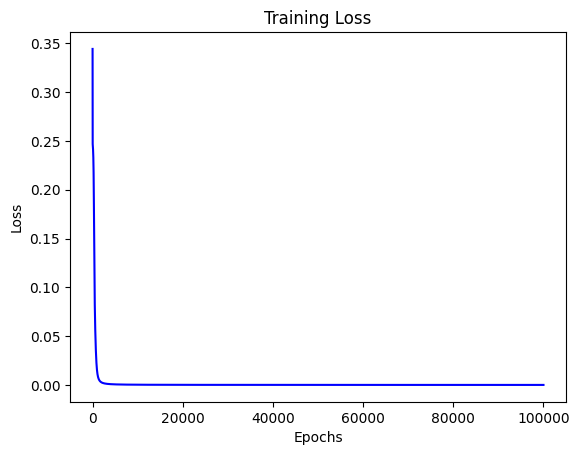

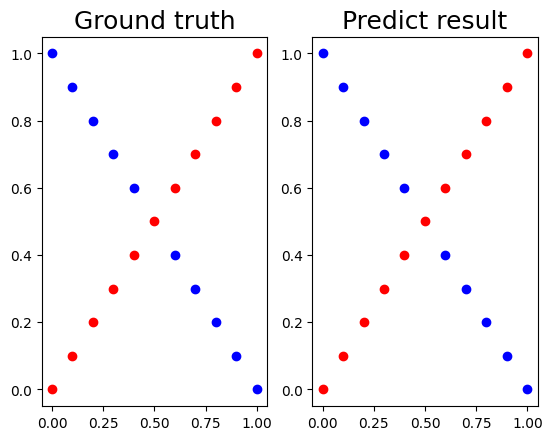

accuracy 100.0%


In [15]:

x,y = generate_XOR_easy()
model =nn_moodel()
train_model(x,y,model)

# linear

epoch 5000 loss : 0.005087
epoch 10000 loss : 0.002745
epoch 15000 loss : 0.001745
epoch 20000 loss : 0.001190
epoch 25000 loss : 0.000850
epoch 30000 loss : 0.000630
epoch 35000 loss : 0.000482
epoch 40000 loss : 0.000378
epoch 45000 loss : 0.000303
epoch 50000 loss : 0.000248
epoch 55000 loss : 0.000205
epoch 60000 loss : 0.000173
epoch 65000 loss : 0.000147
epoch 70000 loss : 0.000126
epoch 75000 loss : 0.000110
epoch 80000 loss : 0.000096
epoch 85000 loss : 0.000085
epoch 90000 loss : 0.000076
epoch 95000 loss : 0.000068
epoch 100000 loss : 0.000062
[[1.00000000e+00]
 [4.42739306e-02]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.84194472e-11]
 [1.00000000e+00]
 [4.77369377e-11]
 [9.99983213e-01]
 [5.29932031e-11]
 [9.99999991e-01]
 [9.99998526e-01]
 [4.58571042e-05]
 [1.81057660e-10]
 [4.92398787e-11]
 [1.00000000e+00]
 [9.99999999e-01]
 [9.98206928e-01]
 [1.00000000e+00]
 [5.23036784e-11]
 [4.91070342e-11]
 [4.87999365e-09]
 [9.99999996e-01]
 [5.13296876e-11]
 [1.00000000e+00]
 [9.9999

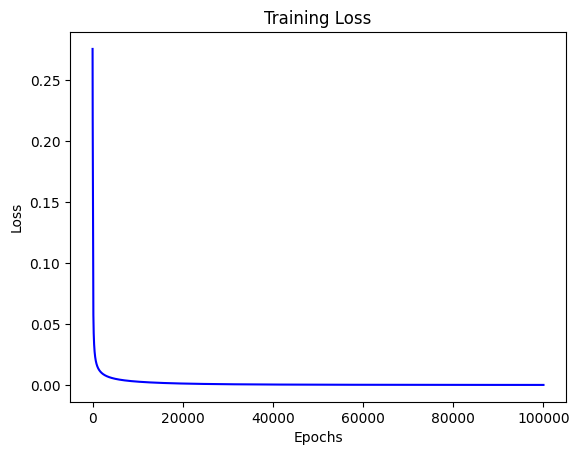

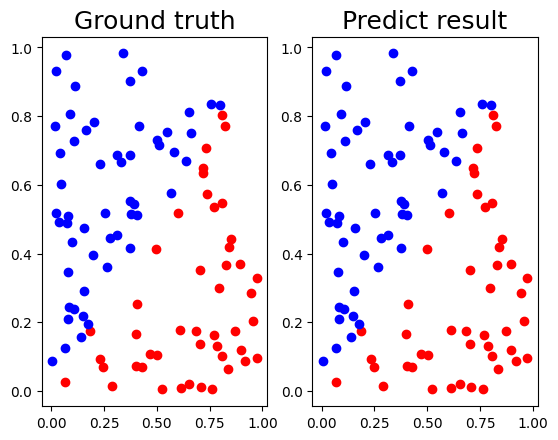

accuracy 100.0%


In [16]:

x,y = generate_linear(100)
model =nn_moodel()
train_model(x,y,model)